# Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# DF Sales
df_sales = pd.read_csv("/content/drive/MyDrive/TFM_EasyMoney/datasets_diccionario_TFM/sales.csv") # sales info
df_sales.head()

,Unnamed: 0,pk_sale,cid,month_sale,product_ID,net_margin
0,0,6666,33620,2018-05-01,2335,952.9
1,1,6667,35063,2018-06-01,2335,1625.2
2,2,6668,37299,2018-02-01,2335,1279.7
3,3,6669,39997,2018-02-01,2335,1511.9
4,4,6670,44012,2018-02-01,2335,1680.3


In [4]:
# DF Customer Commercial Activity
df_cust_com_act = pd.read_csv("/content/drive/MyDrive/TFM_EasyMoney/datasets_diccionario_TFM/customer_commercial_activity.csv") # customer commercial activity info
df_cust_com_act.head()

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES
1,1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
2,2,1050612,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
3,3,1050613,2018-01,2015-08,KHD,0.0,03 - UNIVERSITARIO
4,4,1050614,2018-01,2015-08,KHE,1.0,03 - UNIVERSITARIO


In [6]:
# DF Customer Products
df_cust_prod = pd.read_csv("/content/drive/MyDrive/TFM_EasyMoney/datasets_diccionario_TFM/customer_products.csv") # customer products info
df_cust_prod.head()

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1,1050611,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,2,1050612,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,3,1050613,2018-01,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,4,1050614,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [7]:
# DF Customer Socio Demographics
df_cust_socio_demo = pd.read_csv("/content/drive/MyDrive/TFM_EasyMoney/datasets_diccionario_TFM/customer_sociodemographics.csv") # customer sociodemographic info
df_cust_socio_demo.head()

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01,ES,29.0,H,35,N,87218.10
1,1,1050611,2018-01,ES,13.0,V,23,N,35548.74
2,2,1050612,2018-01,ES,13.0,V,23,N,122179.11
3,3,1050613,2018-01,ES,50.0,H,22,N,119775.54
4,4,1050614,2018-01,ES,50.0,V,23,N,NaN


In [8]:
# DF Product Description
df_prod_desc = pd.read_csv("/content/drive/MyDrive/TFM_EasyMoney/datasets_diccionario_TFM/product_description.csv") # product description info
df_prod_desc.head()

,Unnamed: 0,pk_product_ID,product_desc,family_product
0,0,4657,em_acount,account
1,1,3819,debit_card,payment_card
2,2,1364,pension_plan,pension_plan
3,3,2234,payroll,account
4,4,2235,payroll_account,account


In [9]:
for df in [df_cust_com_act, df_cust_socio_demo, df_cust_prod, df_sales, df_prod_desc]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns='Unnamed: 0', inplace=True)

# Elección de Productos

In [10]:
df_sold_products = (
    df_sales
    .merge(df_prod_desc[['pk_product_ID', 'product_desc']],
           how='left',
           left_on='product_ID',
           right_on='pk_product_ID')
    .drop(columns=['pk_product_ID'])
)

In [11]:
df_sold_products

,pk_sale,cid,month_sale,product_ID,net_margin,product_desc
0,6666,33620,2018-05-01,2335,952.9,short_term_deposit
1,6667,35063,2018-06-01,2335,1625.2,short_term_deposit
2,6668,37299,2018-02-01,2335,1279.7,short_term_deposit
3,6669,39997,2018-02-01,2335,1511.9,short_term_deposit
4,6670,44012,2018-02-01,2335,1680.3,short_term_deposit
...,...,...,...,...,...,...
240768,247434,1553456,2019-05-01,4657,56.7,em_acount
240769,247435,1553541,2019-05-01,4657,66.5,em_acount
240770,247436,1553559,2019-05-01,4657,73.0,em_acount
240771,247437,1553565,2019-05-01,4657,82.3,em_acount


In [12]:
# Crear df base para analizar performance de cada producto
product_performance = (
    df_sold_products[['product_desc']]
    .drop_duplicates()
    .reset_index(drop=True)
)
product_performance

,product_desc
0,short_term_deposit
1,loans
2,mortgage
3,funds
4,securities
5,long_term_deposit
6,credit_card
7,payroll
8,pension_plan
9,payroll_account


In [13]:
# KPIs agregados por product_desc
kpi_agg = (
    df_sold_products.groupby('product_desc')
    .agg(
        nr_sales=('product_desc', 'count'),
        total_net_margin=('net_margin', 'sum')
    )
    .reset_index()
)

# Calcular avg_profit
kpi_agg['avg_profit'] = (kpi_agg['total_net_margin'] / kpi_agg['nr_sales']).round(0).astype(int)

# Merge con product_performance
product_performance = product_performance.merge(kpi_agg, on='product_desc', how='left')
product_performance

,product_desc,nr_sales,total_net_margin,avg_profit
0,short_term_deposit,4441,6601241.5,1486
1,loans,25,54598.1,2184
2,mortgage,10,25325.1,2533
3,funds,880,1319161.5,1499
4,securities,1157,1732993.2,1498
5,long_term_deposit,4227,6327477.4,1497
6,credit_card,5206,312443.4,60
7,payroll,18750,1311247.8,70
8,pension_plan,19369,115757587.1,5976
9,payroll_account,18110,1267134.7,70


In [14]:
df_cust_prod_actual = df_cust_prod[df_cust_prod['pk_partition'] == '2019-05']

In [15]:
df_cust_prod_actual.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
5519929,657826,2019-05,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
5519930,657817,2019-05,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
5519931,657986,2019-05,0,0,0,0,0,0,0,1,1.0,1.0,1,1,1,0,0
5519932,657905,2019-05,0,0,0,0,0,1,0,0,0.0,0.0,0,0,0,0,1
5519933,657336,2019-05,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [16]:
product_columns = [
    'short_term_deposit',
    'loans',
    'mortgage',
    'funds',
    'securities',
    'long_term_deposit',
    'credit_card',
    'payroll',
    'pension_plan',
    'payroll_account',
    'emc_account',
    'debit_card',
    'em_acount'
]

active_clients_series = df_cust_prod_actual[product_columns].sum()

In [17]:
df_active_clients = active_clients_series.reset_index()
df_active_clients.columns = ['product_desc', 'nr_active_clients']

In [18]:
product_performance = product_performance.merge(df_active_clients, on='product_desc', how='left')

In [19]:
product_performance

,product_desc,nr_sales,total_net_margin,avg_profit,nr_active_clients
0,short_term_deposit,4441,6601241.5,1486,2.0
1,loans,25,54598.1,2184,30.0
2,mortgage,10,25325.1,2533,23.0
3,funds,880,1319161.5,1499,1315.0
4,securities,1157,1732993.2,1498,1789.0
5,long_term_deposit,4227,6327477.4,1497,6129.0
6,credit_card,5206,312443.4,60,4801.0
7,payroll,18750,1311247.8,70,16333.0
8,pension_plan,19369,115757587.1,5976,17353.0
9,payroll_account,18110,1267134.7,70,26529.0


In [20]:
product_performance['%_client'] = product_performance['nr_active_clients'] / df_cust_prod_actual.shape[0]

total_margin = product_performance['total_net_margin'].sum()
product_performance['%_revenue'] = product_performance['total_net_margin'] / total_margin

product_performance

,product_desc,nr_sales,total_net_margin,avg_profit,nr_active_clients,%_client,%_revenue
0,short_term_deposit,4441,6601241.5,1486,2.0,0.000005,0.045177
1,loans,25,54598.1,2184,30.0,0.000068,0.000374
2,mortgage,10,25325.1,2533,23.0,0.000052,0.000173
3,funds,880,1319161.5,1499,1315.0,0.002968,0.009028
4,securities,1157,1732993.2,1498,1789.0,0.004038,0.011860
5,long_term_deposit,4227,6327477.4,1497,6129.0,0.013835,0.043303
6,credit_card,5206,312443.4,60,4801.0,0.010838,0.002138
7,payroll,18750,1311247.8,70,16333.0,0.036869,0.008974
8,pension_plan,19369,115757587.1,5976,17353.0,0.039172,0.792210
9,payroll_account,18110,1267134.7,70,26529.0,0.059886,0.008672


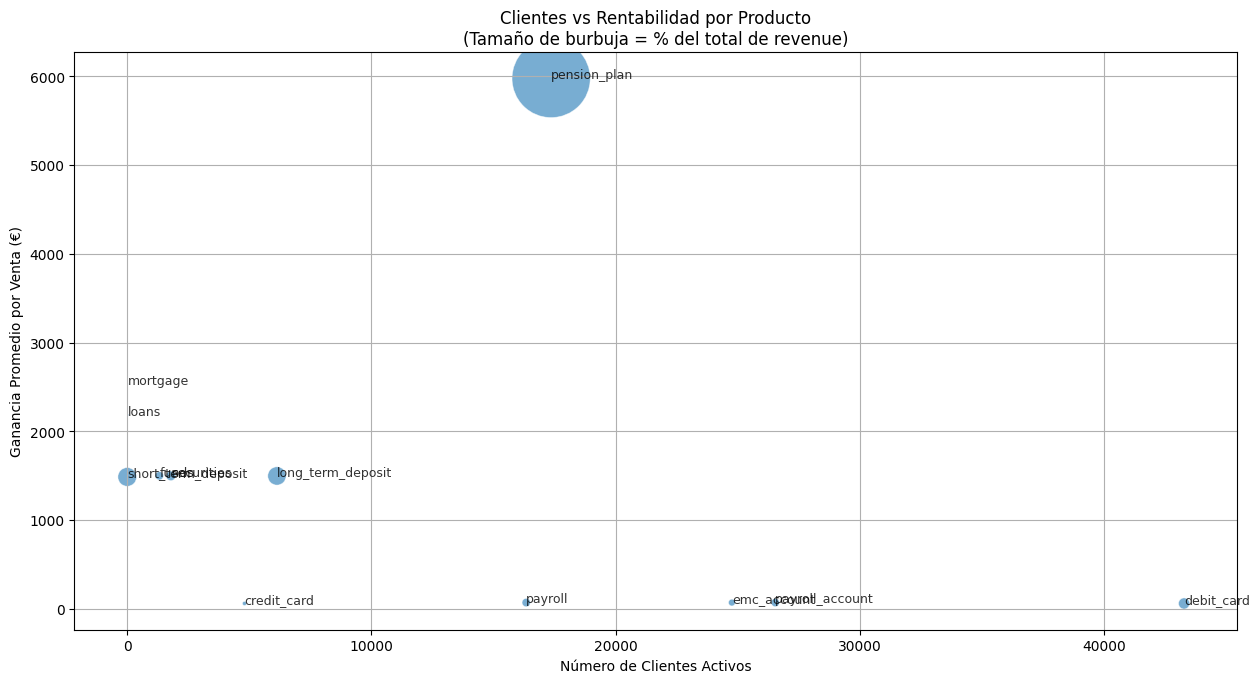

In [21]:
# Filtrar sin em_acount
df_plot = product_performance[product_performance['product_desc'] != 'em_acount']

# Escalar tamaño de burbujas (ajusta si hace falta)
sizes = df_plot['%_revenue'] * 4000

plt.figure(figsize=(15, 7.5))
scatter = plt.scatter(
    x=df_plot['nr_active_clients'],
    y=df_plot['avg_profit'],
    s=sizes,
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

plt.xlabel('Número de Clientes Activos')
plt.ylabel('Ganancia Promedio por Venta (€)')
plt.title('Clientes vs Rentabilidad por Producto\n(Tamaño de burbuja = % del total de revenue)')
plt.grid(True)

# Etiquetas de productos
for i, row in df_plot.iterrows():
    plt.text(row['nr_active_clients'], row['avg_profit'], row['product_desc'], fontsize=9, alpha=0.8)

plt.show()


/tmp/ipython-input-485350770.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x='%_revenue', y='product_desc', palette='Blues_d')


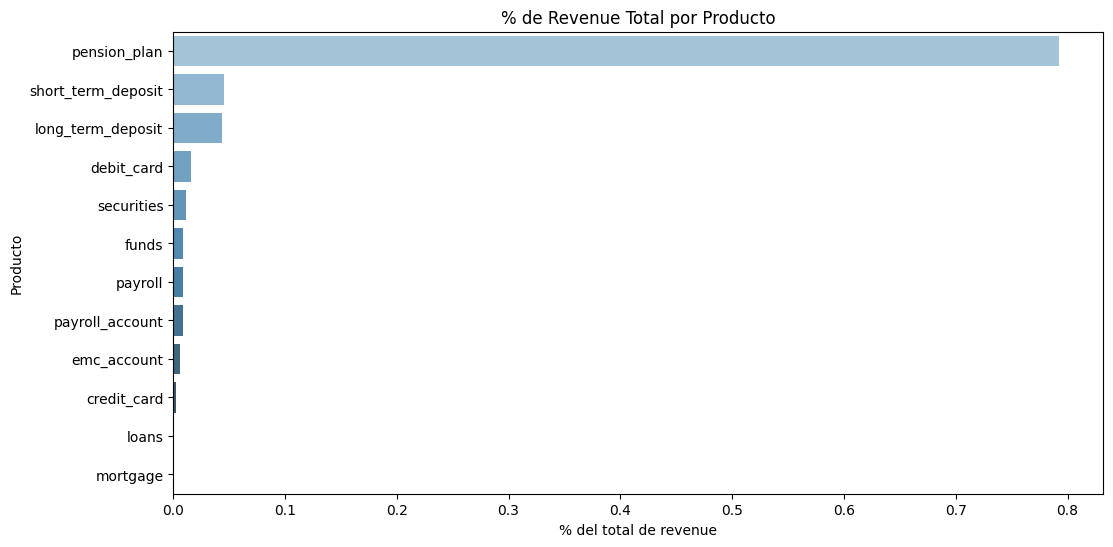

In [22]:
import seaborn as sns

df_plot = product_performance[product_performance['product_desc'] != 'em_acount']
sorted_df = df_plot.sort_values('%_revenue', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_df, x='%_revenue', y='product_desc', palette='Blues_d')
plt.title('% de Revenue Total por Producto')
plt.xlabel('% del total de revenue')
plt.ylabel('Producto')
plt.show()


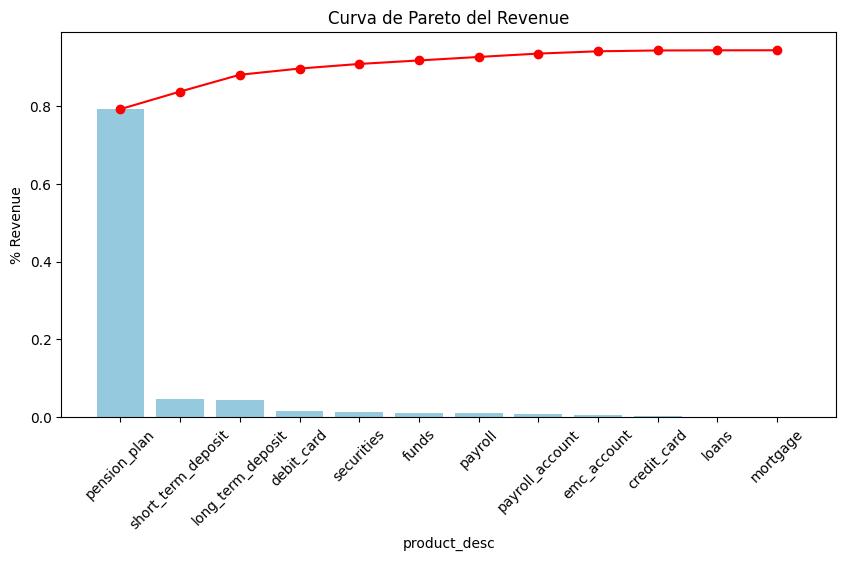

In [23]:
sorted_df['cumulative_revenue'] = sorted_df['%_revenue'].cumsum()

plt.figure(figsize=(10, 5))
sns.barplot(data=sorted_df, x='product_desc', y='%_revenue', color='skyblue')
plt.plot(sorted_df['product_desc'], sorted_df['cumulative_revenue'], color='red', marker='o')
plt.title('Curva de Pareto del Revenue')
plt.xticks(rotation=45)
plt.ylabel('% Revenue')
plt.show()


In [24]:
cols_a_formatear = ['avg_profit', 'total_net_margin', 'nr_sales', 'nr_active_clients', '%_client', '%_revenue']
styled_df = (
    product_performance.style
    .background_gradient(cmap='coolwarm', axis=0, subset=cols_a_formatear)
    .format({col: "{:.2f}" for col in cols_a_formatear})
)
styled_df

,product_desc,nr_sales,total_net_margin,avg_profit,nr_active_clients,%_client,%_revenue
0,short_term_deposit,4441.00,6601241.50,1486.00,2.00,0.00,0.05
1,loans,25.00,54598.10,2184.00,30.00,0.00,0.00
2,mortgage,10.00,25325.10,2533.00,23.00,0.00,0.00
3,funds,880.00,1319161.50,1499.00,1315.00,0.00,0.01
4,securities,1157.00,1732993.20,1498.00,1789.00,0.00,0.01
5,long_term_deposit,4227.00,6327477.40,1497.00,6129.00,0.01,0.04
6,credit_card,5206.00,312443.40,60.00,4801.00,0.01,0.00
7,payroll,18750.00,1311247.80,70.00,16333.00,0.04,0.01
8,pension_plan,19369.00,115757587.10,5976.00,17353.00,0.04,0.79
9,payroll_account,18110.00,1267134.70,70.00,26529.00,0.06,0.01


# Limpieza de Datos

## Definición de Funciones de Imputación

In [25]:
def imputar_por_cliente_valor_mas_antiguo(df, col_objetivo, cliente_id_col='pk_cid', fecha_col='pk_partition'):
    """
    Imputa valores nulos en `col_objetivo` usando el valor más antiguo (por fecha) disponible por cliente.
    Si no hay valor válido para ese cliente, el nulo se mantiene.
    """
    # A. Contar nulos originales
    nulos_antes = df[col_objetivo].isnull().sum()

    # B. Crear un mapeo del valor más antiguo disponible por cliente
    df_no_nulos = df.dropna(subset=[col_objetivo])
    df_ordenado = df_no_nulos.sort_values(by=[cliente_id_col, fecha_col])
    valor_por_cliente = df_ordenado.drop_duplicates(subset=[cliente_id_col])[[cliente_id_col, col_objetivo]]
    dict_valores = dict(zip(valor_por_cliente[cliente_id_col], valor_por_cliente[col_objetivo]))

    # C. Imputar solo donde haya nulo y cliente esté en el diccionario
    def imputar(row):
        if pd.isna(row[col_objetivo]):
            return dict_valores.get(row[cliente_id_col], np.nan)
        return row[col_objetivo]

    df[col_objetivo] = df.apply(imputar, axis=1)

    # D. Contar nulos después
    nulos_despues = df[col_objetivo].isnull().sum()
    imputados = nulos_antes - nulos_despues

    # E. Reporte
    print(f"Imputación en columna: {col_objetivo}")
    print(f" - Nulos antes:     {nulos_antes}")
    print(f" - Imputados:       {imputados}")
    print(f" - Nulos restantes: {nulos_despues}")

In [26]:
def imputar_por_cliente_valor_mas_reciente(df, col_objetivo, cliente_id_col='pk_cid', fecha_col='pk_partition'):
    """
    Imputa valores nulos en `col_objetivo` usando el valor más reciente (por fecha) disponible por cliente.
    Optimizada para grandes volúmenes de datos. No modifica el df original, devuelve None.
    """
    # A. Nulos antes
    nulos_antes = df[col_objetivo].isna().sum()

    # B. Obtener el valor más reciente por cliente (fecha máxima con valor no nulo)
    valor_mas_reciente = (
        df.loc[df[col_objetivo].notna()]
          .sort_values(by=[cliente_id_col, fecha_col], ascending=[True, False])
          .drop_duplicates(subset=[cliente_id_col])
          .set_index(cliente_id_col)[col_objetivo]
    )

    # C. Imputar nulos usando el valor más reciente por cliente
    df[col_objetivo] = df[col_objetivo].fillna(df[cliente_id_col].map(valor_mas_reciente))

    # D. Nulos después
    nulos_despues = df[col_objetivo].isnull().sum()
    imputados = nulos_antes - nulos_despues

    # E. Reporte
    print(f" Imputación con valor MÁS RECIENTE en columna: {col_objetivo}")
    print(f" - Nulos antes:     {nulos_antes}")
    print(f" - Imputados:       {imputados}")
    print(f" - Nulos restantes: {nulos_despues}")

In [27]:
# IMPUTACIÓN JERÁRQUICA POR MÉTODO
#------------------------------------------------

#Lo que hace esta función:

# - Crea una copia del dataframe.
# - Crea lista con las columnas que queremos agrupar.
# - Agrupa por columnas y a la variable dependiente le imputa el método elegido, si el valor está vacío le imputa nan. Hace un dataframe.
# - Del dataframe, elimina los nulos de la variable dependiente.
# - Renombra la variable dependiente.
# - Realiza un join left del dataframe original con los dataframes generados.
# - con la función bfill() rellenamos las filas vacias de la columna original con las columanas generadas.
# - Elimina el resto de columnas generadas.

# Imprime recuento de nulos
# devuelve el dataframe final con los valores imputados.


def imputar_jerarquica_metodo(df, columna_objetivo, lista_columnas_grupo, metodo):
    """
    Imputa valores faltantes en 'columna_objetivo' usando un enfoque jerárquico por grupos.

    Parametros:
    - df: DataFrame a imputar
    - columna_objetivo: columna donde se imputan los NaNs
    - lista_columnas_grupo: lista de columnas para agrupar jerárquicamente
    - metodo: 'mean', 'median' o 'mode'
    """

    if len(lista_columnas_grupo) < 1:
        raise ValueError("La lista de columnas de agrupación debe tener al menos una columna.")

    columnas_generadas = []
    num_nulos_iniciales = df[columna_objetivo].isnull().sum()
    print(f'Nulos iniciales= {num_nulos_iniciales}')

    # Función interna para calcular el valor según el método
    def aplicar_metodo(x):
        val = getattr(x, metodo)()
        if hasattr(val, 'empty'):  # por ejemplo mode()
            return val.iloc[0] if not val.empty else np.nan
        else:  # median, mean, etc.
            return val

    # Definición de combinaciones jerárquicas de columnas
    combinaciones = [
        lista_columnas_grupo[:],                      # Nivel 1: todas las columnas
        lista_columnas_grupo[:-1],                    # Nivel 2: todas menos la última
        [lista_columnas_grupo[i] for i in [0, 2] if i < len(lista_columnas_grupo)],  # Nivel 3: combinacion 0 y 2
        lista_columnas_grupo[:-2] if len(lista_columnas_grupo) > 2 else lista_columnas_grupo[:1]  # Nivel 4: todas menos las 2 últimas
    ]

    # Crear columnas temporales por cada nivel
    for i, cols in enumerate(combinaciones, 1):
        df_temp = df.groupby(cols)[columna_objetivo].agg(aplicar_metodo).reset_index()
        df_temp = df_temp.dropna(subset=[columna_objetivo])
        col_name = f"{columna_objetivo}_{i}"
        df_temp.rename(columns={columna_objetivo: col_name}, inplace=True)
        columnas_generadas.append(col_name)
        df = df.merge(df_temp, how='left', left_on=cols, right_on=cols)

    # Imputación jerárquica usando bfill
    df[columna_objetivo] = df[[columna_objetivo] + columnas_generadas].bfill(axis=1).iloc[:,0]

    # Recuento de imputaciones por nivel
    nulos_previos = df[columna_objetivo].isnull()
    for i, cols in enumerate(combinaciones, 1):
        nulos_fase = nulos_previos & df[columnas_generadas[i-1]].isnull()
        imputados = df.loc[nulos_previos & df[columnas_generadas[i-1]].notnull(), columnas_generadas[i-1]].count()
        print(f"Nulos imputados con grupo {cols} = {imputados}")
        nulos_previos = nulos_fase

    # Limpieza de columnas temporales
    df.drop(columns=columnas_generadas, inplace=True)

    nulos_finales = df[columna_objetivo].isnull().sum()
    nulos_imputados_totales = num_nulos_iniciales - nulos_finales
    print(f'Nulos totales imputados = {nulos_imputados_totales}')
    print(f'Nulos no imputados = {nulos_finales}')

    return df

In [28]:
# IMPUTACIÓN JERÁRQUICA POR MUESTREO ALEATORIO
#------------------------------------------------

#Lo que hace esta función:

# - Crea una copia del dataframe.
# - Crea lista con las columnas que queremos agrupar.
# - Agrupa por columnas y a la variable dependiente le imputa un valor al azar de ese grupo, si el valor esta vacío le imputa nan. Hace un dataframe.
# - Del dataframe, elimina esos nulos de la variable dependiente.
# - Renombra la variable dependiente.
# - Realiza un join left del dataframe original con los dataframes generados.
# - con la función bfill() rellenamos las filas vacías de la columna original con las columanas generadas.
# - Elimina el resto de columnas generadas.

# Imprime recuento de nulos
# devuelve el dataframe final con los valores imputados.

def imputar_jerarquica_muestreo_aleatorio(dataframe, columna_objetivo,  lista_columnas_grupo):

  if len(lista_columnas_grupo) < 1:
        raise ValueError("La lista de columnas de agrupación debe tener al menos una columna.")

  df= dataframe.copy()
  columnas_generadas = []
  num_nulos_iniciales = df[columna_objetivo].isnull().sum()
  print(f'Nulos iniciales= {num_nulos_iniciales}')

  COLUMNS_1 = lista_columnas_grupo[:]
  df_nulls_1 = df.groupby(COLUMNS_1)[columna_objetivo].agg(lambda x: x.dropna().sample(1).iloc[0] if not x.dropna().empty else np.nan).to_frame().reset_index()
  df_nulls_1 = df_nulls_1.dropna(subset=[columna_objetivo])
  df_nulls_1.rename(columns={columna_objetivo:columna_objetivo + '_1'},inplace=True)
  col_1= columna_objetivo + '_1'
  columnas_generadas.append(col_1)

  COLUMNS_2 = lista_columnas_grupo[:-1]
  df_nulls_2 = df.groupby(COLUMNS_2)[columna_objetivo].agg(lambda x: x.dropna().sample(1).iloc[0] if not x.dropna().empty else np.nan).to_frame().reset_index()
  df_nulls_2 = df_nulls_2.dropna(subset=[columna_objetivo])
  df_nulls_2.rename(columns={columna_objetivo:columna_objetivo + '_2'},inplace=True)
  col_2= columna_objetivo + '_2'
  columnas_generadas.append(col_2)

  COLUMNS_3 = [lista_columnas_grupo[i] for i in [0, 2]]
  df_nulls_3 = df.groupby(COLUMNS_3)[columna_objetivo].agg(lambda x: x.dropna().sample(1).iloc[0] if not x.dropna().empty else np.nan).to_frame().reset_index()
  df_nulls_3 = df_nulls_3.dropna(subset=[columna_objetivo])
  df_nulls_3.rename(columns={columna_objetivo:columna_objetivo + '_3'},inplace=True)
  col_3= columna_objetivo + '_3'
  columnas_generadas.append(col_3)

  COLUMNS_4 =lista_columnas_grupo[:-2]
  df_nulls_4 = df.groupby(COLUMNS_4)[columna_objetivo].agg(lambda x: x.dropna().sample(1).iloc[0] if not x.dropna().empty else np.nan).to_frame().reset_index()
  df_nulls_4 = df_nulls_4.dropna(subset=[columna_objetivo])
  df_nulls_4.rename(columns={columna_objetivo:columna_objetivo + '_4'},inplace=True)
  col_4= columna_objetivo + '_4'
  columnas_generadas.append(col_4)

  df = df.merge(df_nulls_1, how='left', left_on= COLUMNS_1, right_on=COLUMNS_1)
  df = df.merge(df_nulls_2, how='left', left_on= COLUMNS_2, right_on=COLUMNS_2)
  df = df.merge(df_nulls_3, how='left', left_on= COLUMNS_3, right_on=COLUMNS_3)
  df = df.merge(df_nulls_4, how='left', left_on= COLUMNS_4, right_on=COLUMNS_4)
  # Calculo de imputaciones por fase
  nulos_a_imputar = df[columna_objetivo].isnull()
  # Fase 1
  imputados_1 = df.loc[nulos_a_imputar, col_1].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_1} = {imputados_1}')

  # Fase 2: solo miramos los que no fueron imputados en fase 1
  nulos_fase_2= nulos_a_imputar & df[col_1].isnull()
  imputados_2 = df.loc[nulos_fase_2, col_2].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_2} = {imputados_2}')

  # Fase 3: solo los que no se imputaron en 1 ni 2
  nulos_fase_3 = nulos_fase_2 & df[col_2].isnull()
  imputados_3 = df.loc[nulos_fase_3, col_3].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_3} = {imputados_3}')

  # Fase 4: solo los que no se imputaron en 1 ni 2 ni 3
  nulos_fase_4 = nulos_fase_3 & df[col_3].isnull()
  imputados_4 = df.loc[nulos_fase_4, col_4].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_4} = {imputados_4}')


  # imputación de los valores
  df[columna_objetivo]= df[[columna_objetivo,columna_objetivo, col_1, col_2, col_3,col_4 ]].bfill(axis=1).iloc[:,0]
  df.drop(columns=columnas_generadas,inplace=True)

  # Recuento final después de imputación
  nulos_finales = df[columna_objetivo].isnull().sum()
  nulos_imputados_totales = num_nulos_iniciales - nulos_finales

  print(f'Nulos totales imputados = {nulos_imputados_totales}')
  print(f'Nulos no imputados = {nulos_finales}')

  return df

## Tratamiento de Nulos

In [29]:
df_cust_merged = (
    df_cust_com_act
    .merge(df_cust_socio_demo, on=['pk_cid', 'pk_partition'], how='inner')
    .merge(df_cust_prod, on=['pk_cid', 'pk_partition'], how='inner')
)
df_cust_merged

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,...,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,V,23,...,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,V,23,...,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01,2015-08,KHD,0.0,03 - UNIVERSITARIO,ES,50.0,H,22,...,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01,2015-08,KHE,1.0,03 - UNIVERSITARIO,ES,50.0,V,23,...,0,0,0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05,2016-08,KHE,0.0,03 - UNIVERSITARIO,ES,50.0,V,22,...,0,0,0,0.0,0.0,0,0,0,0,1
5962920,1166764,2019-05,2016-08,KHE,0.0,03 - UNIVERSITARIO,ES,26.0,V,23,...,0,0,0,0.0,0.0,0,0,0,0,1
5962921,1166763,2019-05,2016-08,KHE,1.0,02 - PARTICULARES,ES,50.0,H,47,...,0,0,0,0.0,0.0,0,0,0,0,1
5962922,1166789,2019-05,2016-08,KHE,0.0,03 - UNIVERSITARIO,ES,50.0,H,22,...,0,0,0,0.0,0.0,0,0,0,0,1


In [30]:
df_cust_merged.isnull().sum()

,0
pk_cid,0
pk_partition,0
entry_date,0
entry_channel,133033
active_customer,0
segment,133944
country_id,0
region_code,2264
gender,25
age,0


In [31]:
imputar_por_cliente_valor_mas_antiguo(df_cust_merged,'entry_channel')

Imputación en columna: entry_channel
 - Nulos antes:     133033
 - Imputados:       123698
 - Nulos restantes: 9335


In [32]:
imputar_por_cliente_valor_mas_reciente(df_cust_merged,'segment')

 Imputación con valor MÁS RECIENTE en columna: segment
 - Nulos antes:     133944
 - Imputados:       124876
 - Nulos restantes: 9068


In [33]:
imputar_por_cliente_valor_mas_reciente(df_cust_merged,'salary')

 Imputación con valor MÁS RECIENTE en columna: salary
 - Nulos antes:     1541104
 - Imputados:       621
 - Nulos restantes: 1540483


In [34]:
imputar_por_cliente_valor_mas_reciente(df_cust_merged,'payroll')

 Imputación con valor MÁS RECIENTE en columna: payroll
 - Nulos antes:     61
 - Imputados:       61
 - Nulos restantes: 0


In [35]:
imputar_por_cliente_valor_mas_reciente(df_cust_merged,'pension_plan')

 Imputación con valor MÁS RECIENTE en columna: pension_plan
 - Nulos antes:     61
 - Imputados:       61
 - Nulos restantes: 0


In [36]:
df_cust_merged.isnull().sum()

,0
pk_cid,0
pk_partition,0
entry_date,0
entry_channel,9335
active_customer,0
segment,9068
country_id,0
region_code,2264
gender,25
age,0


### Definición de Perímetro Clientes

In [37]:
# Definición de perímetro: BD clientes del último mes
df_cust_merged_actual = df_cust_merged[df_cust_merged['pk_partition'] == df_cust_merged['pk_partition'].max()]

In [38]:
# Definición de perímetro: Clientes únicamente mayores de edad
df_cust_merged_actual = df_cust_merged_actual[df_cust_merged_actual['age'] >= 18]

In [39]:
# Definición de perímetro: Clientes no fallecidos
df_cust_merged_actual = df_cust_merged_actual[df_cust_merged_actual['deceased'] == 'N']
df_cust_merged_actual.drop(columns=['deceased'], inplace=True)

In [40]:
df_cust_merged_actual.shape

(440246, 26)

In [41]:
df_cust_merged_actual.isnull().sum()

,0
pk_cid,0
pk_partition,0
entry_date,0
entry_channel,4382
active_customer,0
segment,4483
country_id,0
region_code,160
gender,2
age,0


In [42]:
# Número de filas con al menos un valor nulo
filas_con_nulos = df_cust_merged_actual.isnull().any(axis=1).sum()

# Porcentaje de esas filas respecto al total
porcentaje_con_nulos = (filas_con_nulos / len(df_cust_merged_actual)) * 100

print(f"Filas con al menos un nulo: {filas_con_nulos}")
print(f"Porcentaje: {porcentaje_con_nulos:.2f}%")


Filas con al menos un nulo: 146872
Porcentaje: 33.36%


In [43]:
df_cust_merged_actual = df_cust_merged_actual[df_cust_merged_actual['age'] >= 18]

In [44]:
df_cust_merged_actual.isnull().sum()

,0
pk_cid,0
pk_partition,0
entry_date,0
entry_channel,4382
active_customer,0
segment,4483
country_id,0
region_code,160
gender,2
age,0


In [45]:
df_cust_merged_actual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440246 entries, 5519929 to 5962923
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pk_cid              440246 non-null  int64  
 1   pk_partition        440246 non-null  object 
 2   entry_date          440246 non-null  object 
 3   entry_channel       435864 non-null  object 
 4   active_customer     440246 non-null  float64
 5   segment             435763 non-null  object 
 6   country_id          440246 non-null  object 
 7   region_code         440086 non-null  float64
 8   gender              440244 non-null  object 
 9   age                 440246 non-null  int64  
 10  salary              293396 non-null  float64
 11  short_term_deposit  440246 non-null  int64  
 12  loans               440246 non-null  int64  
 13  mortgage            440246 non-null  int64  
 14  funds               440246 non-null  int64  
 15  securities          440246 non-n

In [46]:
# 1. Borrar filas con nulos en gender
df_cust_merged_actual = df_cust_merged_actual.dropna(subset=['gender'])

# 2. Rellenar nulos en region_code con 0
df_cust_merged_actual['region_code'] = df_cust_merged_actual['region_code'].fillna(0)


In [47]:
df_cust_merged_actual['segment'].value_counts(normalize = True)

,proportion
segment,
03 - UNIVERSITARIO,0.652289
02 - PARTICULARES,0.331241
01 - TOP,0.016470


In [48]:
df_cust_merged_actual = imputar_jerarquica_metodo(df_cust_merged_actual, 'segment', ['region_code','country_id', 'age'], metodo='mode')

Nulos iniciales= 4483
Nulos imputados con grupo ['region_code', 'country_id', 'age'] = 0
Nulos imputados con grupo ['region_code', 'country_id'] = 0
Nulos imputados con grupo ['region_code', 'age'] = 0
Nulos imputados con grupo ['region_code'] = 0
Nulos totales imputados = 4483
Nulos no imputados = 0


In [49]:
df_cust_merged_actual['segment'].value_counts(normalize = True)

,proportion
segment,
03 - UNIVERSITARIO,0.648629
02 - PARTICULARES,0.335060
01 - TOP,0.016311


In [50]:
df_cust_merged_actual = imputar_jerarquica_metodo(df_cust_merged_actual, 'entry_channel', ['region_code','segment', 'age'], metodo='mode')

Nulos iniciales= 4382
Nulos imputados con grupo ['region_code', 'segment', 'age'] = 0
Nulos imputados con grupo ['region_code', 'segment'] = 0
Nulos imputados con grupo ['region_code', 'age'] = 0
Nulos imputados con grupo ['region_code'] = 0
Nulos totales imputados = 4382
Nulos no imputados = 0


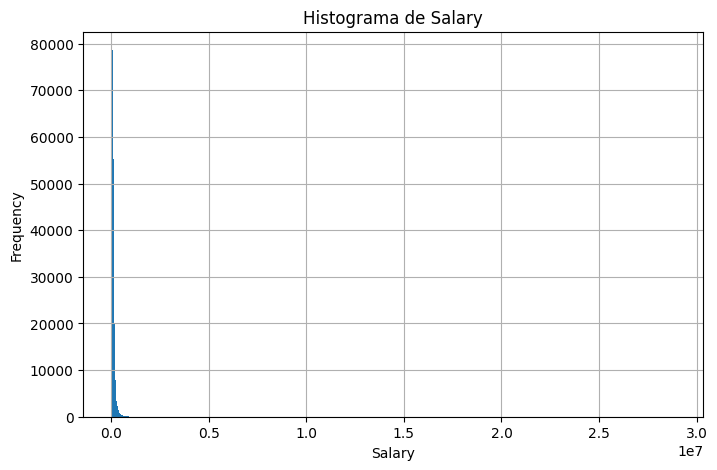

In [51]:
df_cust_merged_actual['salary'].hist(bins=1000, figsize=(8,5))
import matplotlib.pyplot as plt
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histograma de Salary')
plt.show()

In [52]:
df_cust_merged_actual['salary'].describe()

,salary
count,2.933940e+05
mean,1.164624e+05
std,2.073203e+05
min,1.202730e+03
25%,6.153714e+04
50%,8.879556e+04
75%,1.321407e+05
max,2.889440e+07


In [53]:
df_cust_merged_actual = imputar_jerarquica_metodo(df_cust_merged_actual, 'salary', ['segment','country_id', 'age', 'region_code'], metodo='median')

Nulos iniciales= 146850
Nulos imputados con grupo ['segment', 'country_id', 'age', 'region_code'] = 0
Nulos imputados con grupo ['segment', 'country_id', 'age'] = 0
Nulos imputados con grupo ['segment', 'age'] = 0
Nulos imputados con grupo ['segment', 'country_id'] = 0
Nulos totales imputados = 146850
Nulos no imputados = 0


In [54]:
df_cust_merged_actual['salary'].describe()

,salary
count,4.402440e+05
mean,1.087336e+05
std,1.703311e+05
min,1.202730e+03
25%,6.622411e+04
50%,8.834166e+04
75%,1.245264e+05
max,2.889440e+07


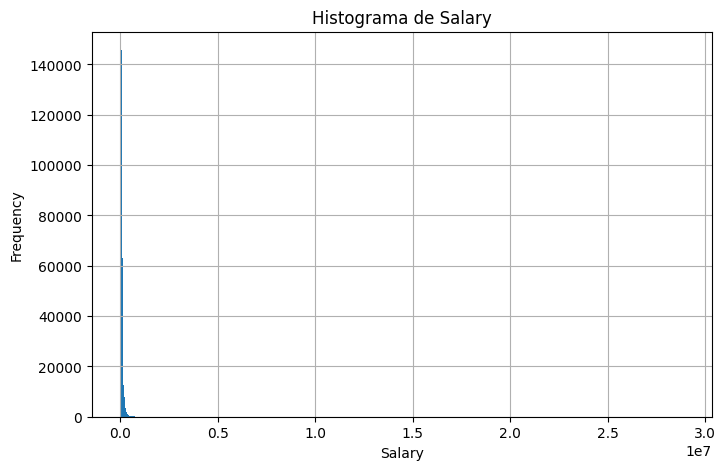

In [55]:
df_cust_merged_actual['salary'].hist(bins=1000, figsize=(8,5))
import matplotlib.pyplot as plt
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histograma de Salary')
plt.show()

## Feature Engineering

En esta sección se generan nuevas variables a partir de la información disponible en la base de clientes, con el objetivo de enriquecer los datos y capturar patrones más relevantes para el análisis. Estos features permiten representar mejor el comportamiento y las características de los clientes, facilitando posteriormente el desarrollo de modelos de propensión a compra y de segmentación (clustering). El propósito es transformar la información cruda en indicadores más interpretables y útiles, que aporten valor predictivo y hagan más robusto el proceso de modelado.

### Segmento Universitario

In [56]:
df_cust_merged_actual["segment"].value_counts(normalize=True)

,proportion
segment,
03 - UNIVERSITARIO,0.648629
02 - PARTICULARES,0.335060
01 - TOP,0.016311


Al tener una categoría tan diluida como la del segmento TOP, se procede a agrupar la variable en únicamente dos categorías siendo estas 03 - UNIVERSITARIO y 02 - PARTICULARES creando una variable binaria llamada segment_universitario

In [57]:
# Crear columna segment_universitario
df_cust_merged_actual["segment_universitario"] = (
    df_cust_merged_actual["segment"].eq("03 - UNIVERSITARIO").astype(int)
)

# Borrar columna segment
df_cust_merged_actual.drop(columns=["segment"], inplace=True)

### Big Region & Average Salary Region

In [58]:
### ['region_code']--> [['big_region', ''avg_salary_region]]
df_cust_merged_actual['region_code'].value_counts()

(
    df_cust_merged_actual.groupby('region_code')
    ['salary']
    .mean()
    .to_frame()
    .reset_index()
    .sort_values('salary', ascending= False))

# contruimos la varibble big_region
ls_big_region = [
    28,  # Madrid
    8,  # Barcelona
    46,  # Valencia
    3,  # Alicante
    41,  # Sevilla
    29,  # Málaga
    30,  # Murcia
    11,  # Cádiz
    7,  # Illes Balears (Baleares)
    35,  # Las Palmas
    48,  # Bizkaia (Vizcaya)
    15,  # A Coruña
    38,  # Santa Cruz de Tenerife
    33,  # Asturias
    50,  # Zaragoza
    36,  # Pontevedra
    18,  # Granada
    43,  # Tarragona
    17   # Girona
]

df_cust_merged_actual['big_region'] = (
    np
    .where(
        df_cust_merged_actual['region_code'].astype(int)
        .isin(ls_big_region),
        1,
        0
    )
)

# construimos la variable avg_salary_region

df_cust_merged_actual['avg_salary_region'] = (
    df_cust_merged_actual
    .groupby('region_code')['salary'].transform('mean')
)

#eliminamos la variable region_code

df_cust_merged_actual.drop(columns= 'region_code', inplace= True)

### Grupo Edades

In [59]:
edades = [0,18,25,35,45,55,np.inf]
#etiquetas
etiquetas = ['0-18','18-25','25-35','35-45','45-55','55+']
#nueva columna
df_cust_merged_actual['grupo_edad'] = pd.cut(df_cust_merged_actual['age'], bins=edades, labels= etiquetas, right= False)

### Debt Score

Cantidad de Productos de Deuda

In [60]:
# Crear la nueva columna 'debt_score'
df_cust_merged_actual['debt_score'] = (
    df_cust_merged_actual[['loans', 'mortgage', 'credit_card']].sum(axis=1)
)

### Debt to Income Score

 Capacidad de responder a la deuda segun el nivel de ingresos Debt Score/Salary

In [61]:
# Crear la nueva columna 'debt_income_score'
df_cust_merged_actual['debt_income_score'] = np.where(
    df_cust_merged_actual['salary'] > 0,
    df_cust_merged_actual['debt_score'] / df_cust_merged_actual['salary'],
    df_cust_merged_actual['debt_score']  # si salary == 0
)

### Customer Profit last 17 months

 Net Margin a single customer generated for the company in the last 17 months

In [62]:
# 1 Crear df con net_margin sumado por cliente
df_17_months_customer_profit = (
    df_sales.groupby('cid', as_index=False)['net_margin']
    .sum()
    .rename(columns={'net_margin': 'cust_profit_17m'})
)

# Verificamos los primeros registros
df_17_months_customer_profit.head()

,cid,cust_profit_17m
0,15891,66.4
1,16203,96.7
2,16502,132.9
3,17457,56.0
4,17970,879.8


In [63]:
# 2 Mapear al df de clientes, asignando 0 si no hay transacciones
df_cust_merged_actual['cust_profit_17m'] = df_cust_merged_actual['pk_cid'].map(
    df_17_months_customer_profit.set_index('cid')['cust_profit_17m']
).fillna(0)

### Transactions last 17 months

In [64]:
# 1 Crear df con número de transacciones por cliente
df_17_months_customer_txn = (
    df_sales.groupby('cid', as_index=False)['net_margin']  # usamos cualquier columna, aquí net_margin
    .count()
    .rename(columns={'net_margin': 'transactions_17m'})
)

# Verificamos los primeros registros
df_17_months_customer_txn.head()

# 2 Mapear al df de clientes, asignando 0 si no hay transacciones
df_cust_merged_actual['transactions_17m'] = df_cust_merged_actual['pk_cid'].map(
    df_17_months_customer_txn.set_index('cid')['transactions_17m']
).fillna(0)

### Months Since Last Purchase

In [65]:
# Última partición directa
last_partition = pd.to_datetime('2019-05-01')  # convertir a fecha completa

# Agrupamos por cliente y calculamos meses desde última compra
df_last_purchase = (
    df_sales.groupby('cid', as_index=False)['month_sale']
    .max()
    .assign(
        months_since_last_purchase=lambda x: (
            (last_partition.to_period('M') - pd.to_datetime(x['month_sale']).dt.to_period('M')).apply(lambda y: y.n)
        )
    )
    .rename(columns={'month_sale': 'last_purchase_month'})
)

# Mapear al df de clientes usando pk_cid, asignando 17 si no hay transacciones
df_cust_merged_actual['months_since_last_purchase'] = df_cust_merged_actual['pk_cid'].map(
    df_last_purchase.set_index('cid')['months_since_last_purchase']
).fillna(17)

# Comprobación rápida
df_cust_merged_actual[['pk_cid', 'months_since_last_purchase']].head()

,pk_cid,months_since_last_purchase
0,657826,17.0
1,657817,17.0
2,657986,14.0
3,657905,17.0
4,657336,1.0


### Customer Tenure

In [66]:
# Columnas a date type
df_cust_merged_actual['entry_date'] = pd.to_datetime(df_cust_merged_actual['entry_date'])
df_cust_merged_actual['pk_partition'] = pd.to_datetime(df_cust_merged_actual['pk_partition'])

# Año y mes de entry_date
df_cust_merged_actual['entry_year'] = df_cust_merged_actual['entry_date'].dt.year.astype(int)
df['entry_month'] = df_cust_merged_actual['entry_date'].dt.month.astype(int)

# Tenure en meses: diferencia entre pk_partition y entry_date
df_cust_merged_actual['tenure'] = ((df_cust_merged_actual['pk_partition'].dt.year - df_cust_merged_actual['entry_date'].dt.year) * 12 +
                (df_cust_merged_actual['pk_partition'].dt.month - df_cust_merged_actual['entry_date'].dt.month)).astype(int)
# Eliminar columna
df_cust_merged_actual.drop(['entry_date'], inplace=True, axis=1)

### Entry Channel

Para esta variable únicamente se agrupan las categorías con frecuencia acumulada menor a 99% para reducir la dispersión de datos

In [67]:
### ['entry_channel']

# visualizamos valores de 'entry_channel'

def cum_freq(df, col):
    df_cum_freq = df[col].value_counts(normalize= True, dropna= False).to_frame().reset_index()
    df_cum_freq.columns = [col, 'frequency']
    df_cum_freq ['cum_frequency'] = df_cum_freq['frequency'].cumsum()
    df_cum_freq['frequency'] = round(df_cum_freq['frequency'].mul(100), 3)
    df_cum_freq['cum_frequency'] = round(df_cum_freq['cum_frequency'].mul(100), 3)

    return df_cum_freq

df_cum_freq = cum_freq(df_cust_merged_actual, 'entry_channel')

In [68]:
# Le pasamos la concición np.where al df_merged_customers para cambiar todos los entry_channel con cum_frequency >= 99% a 'OTHERS'
df_cust_merged_actual['entry_channel'] = np.where(
    df_cust_merged_actual['entry_channel']
    .map(df_cum_freq.set_index('entry_channel')['cum_frequency']>=99),
    'OTHERS',
    df_cust_merged_actual['entry_channel']
)

cum_freq(df_cust_merged_actual, 'entry_channel')

,entry_channel,frequency,cum_frequency
0,KHE,44.500,44.500
1,KHQ,17.078,61.579
2,KFC,13.714,75.292
3,KHM,6.813,82.106
4,KAT,5.862,87.967
5,KHK,3.670,91.637
6,KHN,3.641,95.278
7,OTHERS,1.495,96.773
8,RED,1.161,97.935
9,KHD,1.095,99.030


In [69]:
df_cust_merged_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440244 entries, 0 to 440243
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   pk_cid                      440244 non-null  int64         
 1   pk_partition                440244 non-null  datetime64[ns]
 2   entry_channel               440244 non-null  object        
 3   active_customer             440244 non-null  float64       
 4   country_id                  440244 non-null  object        
 5   gender                      440244 non-null  object        
 6   age                         440244 non-null  int64         
 7   salary                      440244 non-null  float64       
 8   short_term_deposit          440244 non-null  int64         
 9   loans                       440244 non-null  int64         
 10  mortgage                    440244 non-null  int64         
 11  funds                       440244 non-

In [70]:
# eliminar columnas pk_partition y country_id
df_cust_merged_actual = df_cust_merged_actual.drop(columns=['pk_partition', 'country_id'])

## Preprocesamiento

In [71]:
# Definir columnas categóricas a codificar
categorical_cols = ['gender', 'entry_channel', 'grupo_edad']

# Crear encoder
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Ajustar y transformar directamente sobre el df
ohe_fit = ohe.fit(df_cust_merged_actual[categorical_cols])

# Transformar
ohe_data = pd.DataFrame(
    ohe_fit.transform(df_cust_merged_actual[categorical_cols]),
    columns=ohe_fit.get_feature_names_out(categorical_cols),
    index=df_cust_merged_actual.index
)

# Eliminar las columnas originales y reemplazarlas por las codificadas
df_cust_merged_actual = df_cust_merged_actual.drop(columns=categorical_cols)
df_cust_merged_actual[ohe_data.columns] = ohe_data


In [72]:
df_cust_merged_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440244 entries, 0 to 440243
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   pk_cid                      440244 non-null  int64  
 1   active_customer             440244 non-null  float64
 2   age                         440244 non-null  int64  
 3   salary                      440244 non-null  float64
 4   short_term_deposit          440244 non-null  int64  
 5   loans                       440244 non-null  int64  
 6   mortgage                    440244 non-null  int64  
 7   funds                       440244 non-null  int64  
 8   securities                  440244 non-null  int64  
 9   long_term_deposit           440244 non-null  int64  
 10  em_account_pp               440244 non-null  int64  
 11  credit_card                 440244 non-null  int64  
 12  payroll                     440244 non-null  float64
 13  pension_plan  

## Guardado de Datos Limpios

In [73]:
df_cust_merged_actual.to_csv("df_cust_clean.csv", index=False)